In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import config
import utility.df
import utility.iolib
import utility.plotlib

#env = sys.argv[1] if len(sys.argv) > 2 else "dev"

In [2]:
# Setup configuration
cfg = config.ResearchConfig
time_format = cfg.CSV_TIME_FORMAT
date_format = cfg.CSV_DATE_FORMAT
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE, format=cfg.CSV_DATE_FORMAT)

# Retrieve data
df_subspt, df_lesson = utility.iolib.retrieve_data(cfg)
print("Complete loading data for subscription and lesson history!")

Complete loading data for subscription and lesson history!


# Distribution of subscription length per pupil

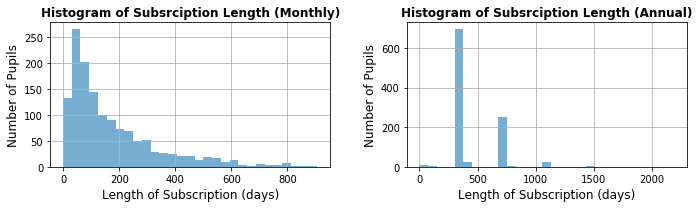

In [3]:
# Distribution of subscription length per pupil

utility.plotlib.subspt_dist(df_subspt, cfg)

# Active subscriptions over time
x - Date
<br> y - Number of active subscriptions
# Average remaining subscription length
x - Date
<br> y - Average subscription time length left per student

Start preparing the time-series data for subscription.


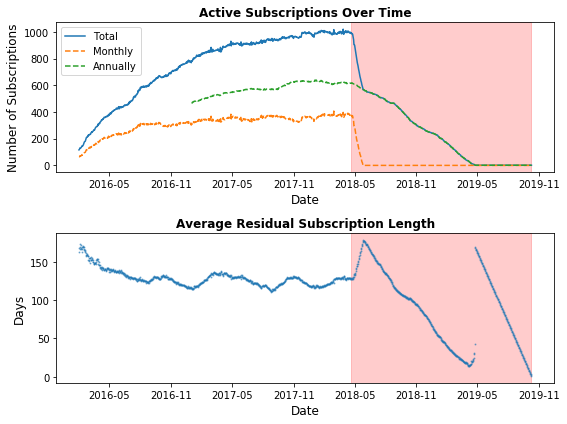

In [15]:
print("Start preparing the time-series data for subscription.")
df_subspt_timeseries = utility.df.subspt_timeseries(df_subspt, cfg)

# Active subscriptions over time
# Average remaining subscription length
utility.plotlib.active_subspt(df_subspt_timeseries, cfg)

In [16]:
df_agg_monthly = df_subspt_timeseries[df_subspt_timeseries.index < cutoff_date].resample('M').sum()

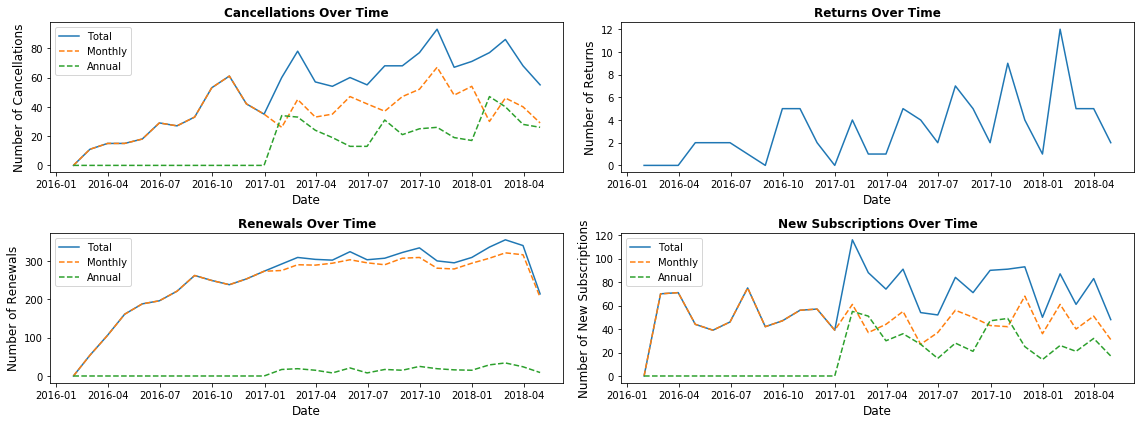

In [17]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(221)
ax.plot(df_agg_monthly.index, df_agg_monthly.num_ccl_ann + df_agg_monthly.num_ccl_mon, label='Total')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_ccl_mon, '--', label='Monthly')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_ccl_ann, '--', label='Annual')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Cancellations Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12) 
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')
ax.legend()

ax = fig.add_subplot(222)
ax.plot(df_agg_monthly.index, df_agg_monthly.num_rtn_a2a + \
        df_agg_monthly.num_rtn_a2m + df_agg_monthly.num_rtn_m2a + df_agg_monthly.num_rtn_m2m)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Returns')
ax.set_title('Returns Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')

ax = fig.add_subplot(223)
ax.plot(df_agg_monthly.index, df_agg_monthly.num_rnl_m2m + df_agg_monthly.num_rnl_a2a + \
       df_agg_monthly.num_rnl_m2a + df_agg_monthly.num_rnl_a2m, label='Total')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_rnl_m2m + df_agg_monthly.num_rnl_m2a, '--', label='Monthly')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_rnl_a2a + df_agg_monthly.num_rnl_a2m, '--', label='Annual')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Renewals')
ax.set_title('Renewals Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(df_agg_monthly.index, df_agg_monthly.num_new_ann + df_agg_monthly.num_new_mon, label='Total')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_new_mon, '--', label='Monthly')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_new_ann, '--', label='Annual')
ax.set_xlabel('Date')
ax.set_ylabel('Number of New Subscriptions')
ax.set_title('New Subscriptions Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')
ax.legend()

plt.tight_layout()

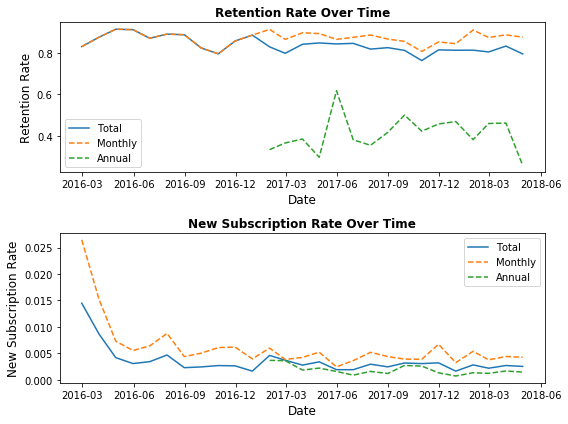

In [18]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(211)
num_rnl_mon = df_agg_monthly.num_rnl_m2a + df_agg_monthly.num_rnl_m2m
num_rnl_ann = df_agg_monthly.num_rnl_a2m + df_agg_monthly.num_rnl_a2a
num_opt_mon = df_agg_monthly.num_ccl_mon + num_rnl_mon
num_opt_ann = df_agg_monthly.num_ccl_ann + num_rnl_ann
ax.plot(df_agg_monthly.index, (num_rnl_mon+num_rnl_ann)/(num_opt_mon+num_opt_ann), label='Total')
ax.plot(df_agg_monthly.index, num_rnl_mon/num_opt_mon, '--', label='Monthly')
ax.plot(df_agg_monthly.index, num_rnl_ann/num_opt_ann, '--', label='Annual')
ax.set_xlabel('Date')
ax.set_ylabel('Retention Rate')
ax.set_title('Retention Rate Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12) 
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')
ax.legend()

ax = fig.add_subplot(212)
ax.plot(df_agg_monthly.index, (df_agg_monthly.num_new_mon + df_agg_monthly.num_new_ann)/df_agg_monthly.num_subscriptions, label='Total')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_new_mon/df_agg_monthly.num_subscriptions_monthly, '--', label='Monthly')
ax.plot(df_agg_monthly.index, df_agg_monthly.num_new_ann/df_agg_monthly.num_subscriptions_annual, '--', label='Annual')
ax.set_xlabel('Date')
ax.set_ylabel('New Subscription Rate')
ax.set_title('New Subscription Rate Over Time')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_fontsize(12)
ax.title.set_fontweight('bold')
ax.legend()

plt.tight_layout()

In [8]:
# Pre-process data in lesson history table:
# 1) Get the list of pupilId from subscription table
# 2) In lesson history table, filter out all records without a matched pupilId
# 3) Make sure the time period of study for the two tables are the same

# Compute the product daily usage measured in seconds, 
# using both the complete and incomplete lesson history tables:
# 1) Use the timeTaken records in the complete lesson history tables
# 2) Only use the timeTaken records for eventually completed lessons in the incomplete history tables